In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [2]:
data = pd.read_csv('DatosfiltradosII.csv', header = 0)

In [3]:
data=data.drop(columns=['Cod.Car.Sec','Unnamed: 0','Nota.Final','Anho.Firma'])

In [4]:
#data['Anho.Firma']=np.where(data['Anho.Firma']>0,1,data['Anho.Firma'])

In [5]:
#for x in range(1897):
    #data['Nota.Final'].values[x]= str(data['Nota.Final'].values[x]).split(",")[-1].split("-")[-1]

In [6]:
#data['Nota.Final']=np.where(data['Nota.Final']=='nan',0,data['Nota.Final'])
#data['Nota.Final']=data['Nota.Final'].apply(pd.to_numeric) 


<AxesSubplot:>

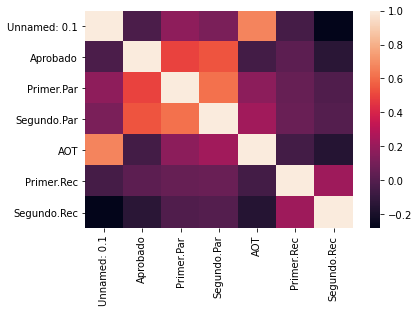

In [7]:
sns.heatmap(data.corr())

In [8]:
X_train,X_test,y_train,y_test=train_test_split(data.drop('Aprobado',axis=1),data['Aprobado'],test_size=0.5) # con 0.5 se encontro la mejores metricas

In [9]:
LogReg= LogisticRegression(solver='lbfgs',max_iter=1050)
LogReg.fit(X_train,y_train)
print(X_train.columns)

Index(['Unnamed: 0.1', 'Primer.Par', 'Segundo.Par', 'AOT', 'Primer.Rec',
       'Segundo.Rec'],
      dtype='object')


In [10]:
from sklearn.metrics import confusion_matrix
y_pred=LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[561  68]
 [ 76 244]]


In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test.T,y_pred.T))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89       629
           1       0.78      0.76      0.77       320

    accuracy                           0.85       949
   macro avg       0.83      0.83      0.83       949
weighted avg       0.85      0.85      0.85       949



In [12]:

from sklearn.metrics import accuracy_score
exactitud1=accuracy_score(y_test,y_pred)*100
print('Exactitud del modelo: ',exactitud1,' %')

Exactitud del modelo:  84.82613277133825  %


In [14]:
data.head()

,Unnamed: 0.1,Aprobado,Primer.Par,Segundo.Par,AOT,Primer.Rec,Segundo.Rec
0,4455,0,7,0,0,0,0
1,4456,1,18,15,0,0,0
2,4457,0,13,0,0,0,0
3,4458,0,0,0,0,0,0
4,4459,0,4,8,0,0,0
